# deep-learning

### In this notebook we will review some of the basics and mathematical understandings behind perceptrons , the perceptrons network and mathematical approach through one epoch.

lets start looking into how a basic perceptron network looks like and why it's network is formulated the way it is.
let's understand its working with an analogical example.Imagine you have to predict the probable house price , you would take a lot of information into consideration before you could make that guess. so basically you are feeding a set of information to your brain , your brain processes that information and then comes up with an answer .It maybe the right price or the wrong one that's not important ,what you have to understand is that your brain was able to make that decision based on pre-existing experience and the brain was able to train it-self on that.A similar logic follows nueral networks.

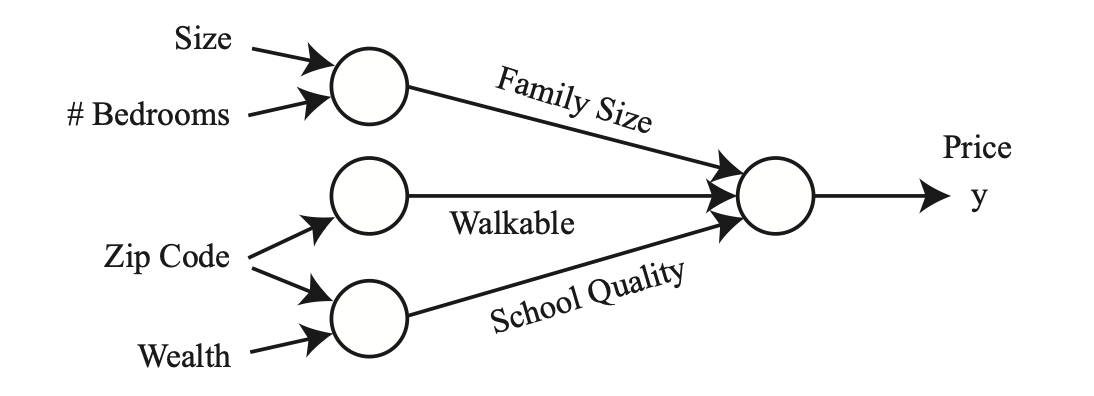

we input a set of data and our output would be y . but between that flow of x to y there is a set of fuction which is formed by logic/experience that weights it just about the right number to make a decision. 
mathematically we can represent it as f : x → y.

so using a network of these perceptron can weighing in different factors into consideration by comparing it self with what was actually supposed to be the correct value . so we could build a network of these perceptrons to continuosly learn the correct weight parameters needed to make a certain decision .
so our network would look something like this ,

<img src="hidden-layers-in-network.gif" width="750" align="center">


we have a input layer which runs through a hidden layer to give an output .








Now let's look at indivisual perceptrons ,
these are nothing but linear classifiers that are adjusting itself in a hyperplane where y ∈ {1,-1} based on certain weight criteria .
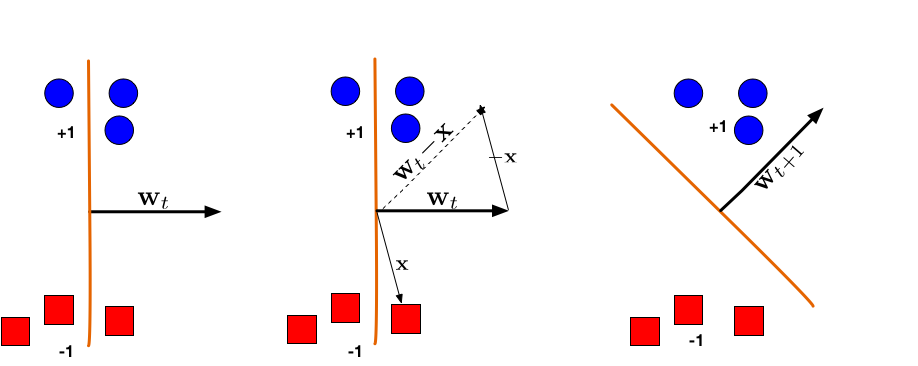

 (Left:)The hyperplane defined by wt  misclassifies one red (-1) and one blue (+1) point. (Middle:) The red point x
is chosen and used for an update. Because its label is -1 we need to subtract x from wt . (Right:) The udpated hyperplane wt+1=wt−x separates the two classes and the Perceptron algorithm has converged.
If a data set is linearly separable, the Perceptron will find a separating hyperplane in a finite number of updates. (If the data is not linearly separable, it will loop forever.)



In the next example lets try to understand working of a two-layer neural network for an image data with 784 pixels,
these pixel data could be vectorised ,
this vectorised data will be our input with two hidden layers of 10 nodes (The second layer, or hidden layer, could have any amount of nodes, but we’ve made it really simple here with just 10 nodes) with an output $\hat{y}$  and our nueral network would look something like this ,

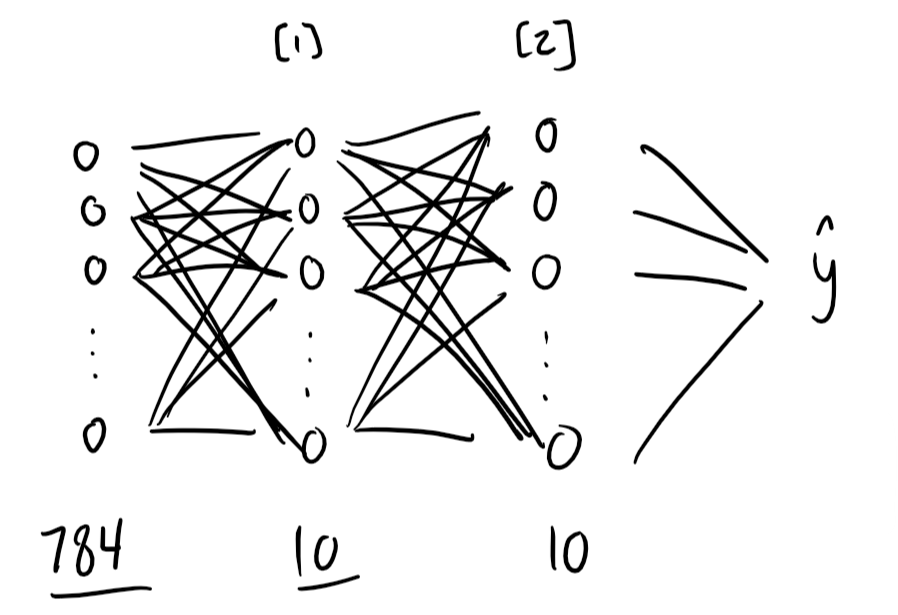



The process of taking an image input and running through the neural network to get a prediction is called forward propagation. The prediction that is made from a given image depends on the weights and biases, or parameters, of the network.
To train a neural network, then, we need to update these weights and biases to produce accurate predictions. We do this through a process called gradient descent. The basic idea of gradient descent is to figure out what direction each parameter can go in to decrease error by the greatest amount, then nudge each parameter in its corresponding direction over and over again until the parameters for minimum error and highest accuracy are found.


In a neural network, gradient descent is carried out via a process called backward propagation, or backprop. In backprop, instead of taking an input image and running it forwards through the network to get a prediction, we take the previously made prediction, calculate an error of how off it was from the actual value, then run this error backwards through the network to find out how much each weight and bias parameter contributed to this error. Once we have these error derivative terms, we can nudge our weights and biases accordingly to improve our model. 

### The Math overview

As mentioned earlier, each training example can be represented by a vector with 784 elements, corresponding to each of the image’s 784 pixels.
These vectors can be stacked together in a matrix to carry out vectorized calculations. That is, instead of using a for loop to go over all training examples, we can calculate error from all examples at once with matrix operations.
In most contexts, including for machine learning, the convention is to stack these vectors as rows of the matrix, giving the matrix dimensions of m rows x n columns where m is the number of training examples and n is the number of features, in this case 784. To make our math easier, we’re going to transpose this matrix, giving it dimensions
nxm instead, with each column corresponding to a training example and each row a training feature.

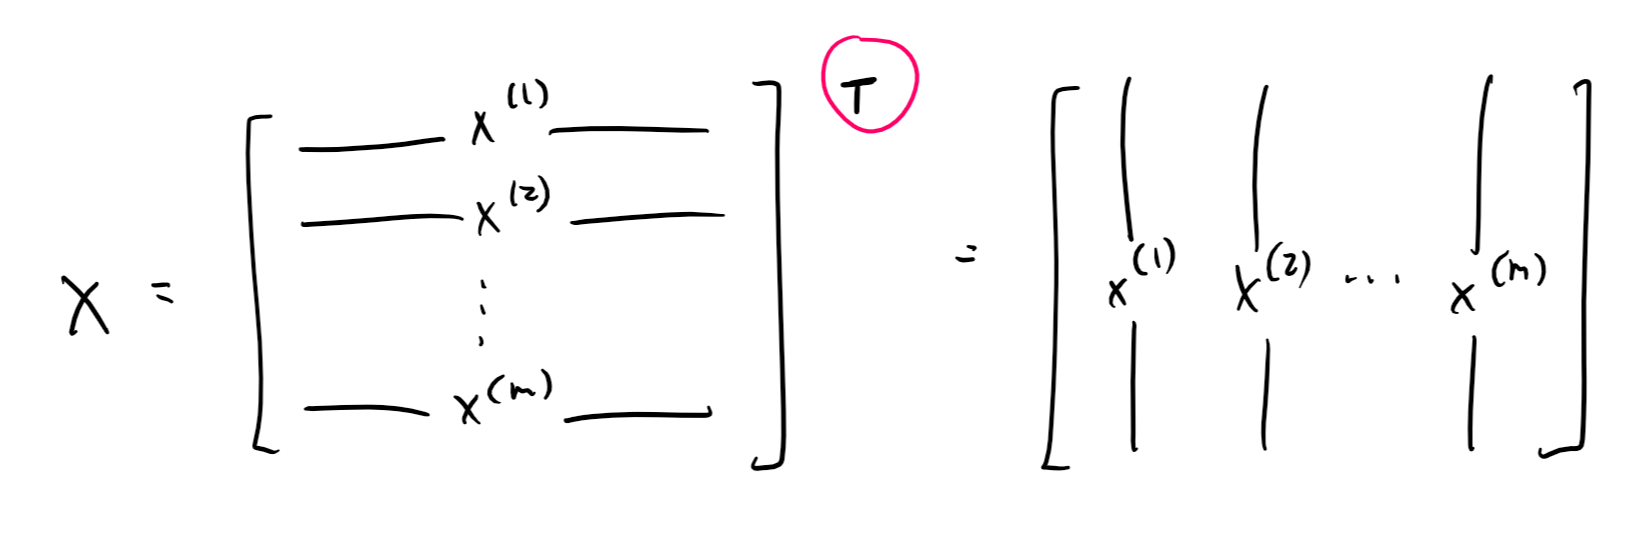

Let’s look at our neural network now. Between every two layers is a set of connections between every node in the previous layer and every node in the following one. That is, there is a weight $w_{i,j}$ for every i in the number of  nodes in the previous layer and every j in the number of nodes in the following one.
It’s natural, then, to represent our weights as a matrix of dimensions $n^{[l]}\times n^{[l-1]}$  , where $n^{[l-1]}$ is the number of nodes in the previous layer and $n^{[l]}$ is the number of nodes in the following layer .
Let’s call this matrix $W^{[l]}$ corresponding to layer $l$ of our network . for example, $W^{[l]}$ will be a $ 10\times784$ ,taking us from the 784 nodes of the input layer to the 10 nodes of the first hidden layer . $W^{[2]}$ will have dimensions $10\times10$ .
Biases are simply constant terms added to each node of the following layer, so we can represent it as a matrix with dimensions $n^{[l]}\times 1$  Let’s call these matrices $b^{[l]}$, so that $b^{[1]}$ and $b^{[2]}$ both have dimensions $10\times1$ .


With these representations in mind, we can now write the equations for forward propagation.

First, we’ll compute the unactivated values of the nodes in the first hidden layer by applying $W^{[1]}$ and $b^{[1]}$ to our input layer. We’ll call the output of this operation $Z^{[1]}$:
$Z^{[1]} = W^{[1]}X+b^{[1]}$
Remember that X has dimensions $784\times m$ and $W^{[1]} :\  10\times784$.

$W^{[1]}X$is the dot product between the two, yielding a new matrix of dimensions $10\times m$

Our bias term $b^{[1]}$ has $10\times1$ dimension , but we want the same column of biases to be applied to all m columns of training examples, so $b^{[1]}$ is effectively broadcast into a matrix of dimensions $10\times m$ when calculating $Z^{[1]}$ , matching the dimensions of $W^{[1]}X$
We need to do one more calculation before moving on to the next layer, though, and that’s applying a non-linear activation to $Z^{[1]}$ . what's the significance of it ?

Imagine that we didn’t do anything to $Z^{[1]}$ now, and multiplied it by $W^{[2]}$ and added $b^{[2]}$ to get the value for the next layer.$Z^{[1]}$is a linear combination of the input features, and the second layer would be a linear combination of $Z^{[1]}$, making it still a linear combination of the input features. That means that our hidden layer is essentially useless, and we’re just building a linear regression model.

To prevent this reduction and actually add complexity with our layers, we’ll run $Z^{[1]}$  through a non-linear activation function before passing it off to the next layer. In this case, we’ll be using a function called a rectified linear unit, or ReLU:

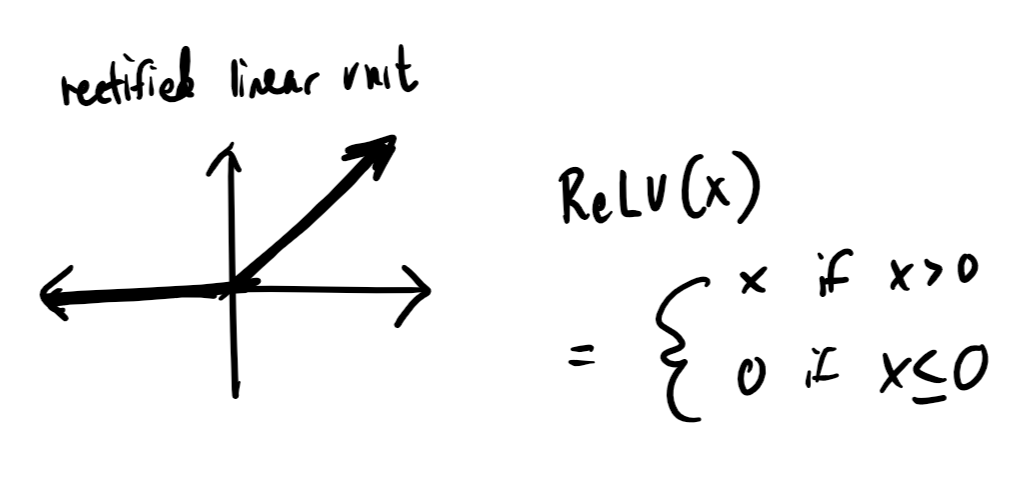

 More generally, A = g(Z) where g(Z) is some activation function. 
 Example activation functions include:
 <br>
        ->  $g(Z) = \dfrac{1 }{ 1+e^{−Z}}$ [sigmoid]
 <br>
        ->  $g(Z) = max(Z, 0)$ [ReLU]
 <br>
        ->  $ g(Z) =  \dfrac{e^{z} - e^{−z} }{e^{z} + e^{−z}}$ [tanh]

ReLU is a really simple function: it’s linear if the input value is above 0, and outputs 0 otherwise. Just this much, though, is enough to ensure that our model doesn’t collapse to a linear one.



from $Z^{[1]}$, we’ll calculate a value$ A^{[1]}$ for the values of the nodes in the hidden layer of our neural network after applying our activation function to it:


$A^{[1]} = \text{ReLU}(Z^{[1]})$

More generally, you might see this written as $A^{[l]} = g(Z^{[l]})$with g referring to an arbitrary activation function that may be something other than ReLU.

Once we have $A^{[1]}$, we can proceed to calculating the values for our second layer, which is also our output layer. First, we calculate$W^{[2]}$:
<br>
$Z^{[2]} = W^{[2]}A^{[1]}+b^{[2]}$

Then, we’ll apply an activation function to $Z^{[2]}$ to get our final output.

If this second layer were just another hidden layer, with more hidden layers or an output layer after it, we would apply ReLU again. But since it’s the output layer, we’ll apply a special activation function called softmax:

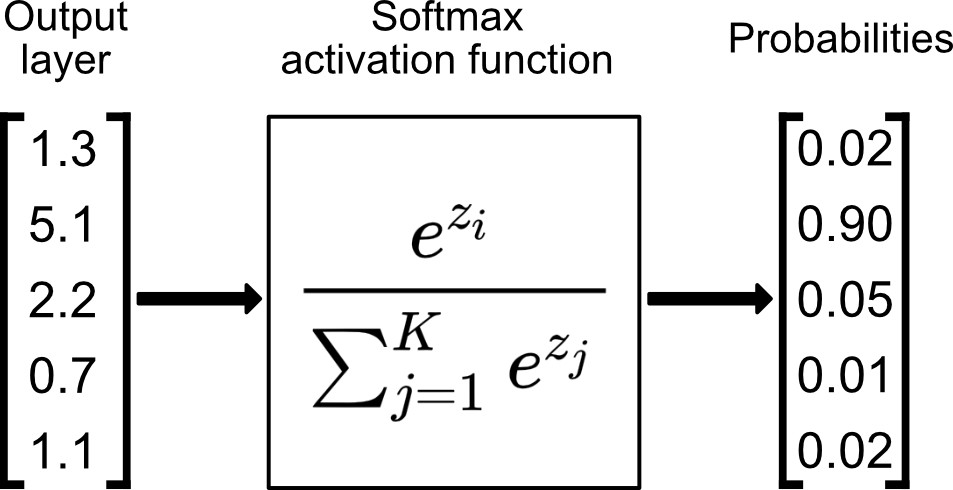

Softmax takes a column of data at a time, taking each element in the column and outputting the exponential of that element divided by the sum of the exponentials of each of the elements in the input column. The end result is a column of probabilities between 0 and 1.

The value of using softmax for our output layer is that we can read the output as probabilities for certain predictions. In the diagram above, for example, we might read the output as a prediction that the second class has a 90% probability of being the correct label, the third a 5% probability, the fourth a 1% probability, and so on.

Let’s find our $A^{[2]}$:<br>
$A^{[2]} = \text{softmax}(Z^{[2]})$

Softmax runs element-wise, so the dimensions of $Z^{[2]}$ are preserved at $10\times m$ .We can read this output matrix as follows: value $ A^{[2]}_{i, j}$ is the probability that example j is an image of the digit i.
With that, we’ve run through the entire neural network, going from our input $X$ containing all of our training examples to an output matrix $A^{[2]}$ containing prediction probabilities for each example.

Now let's focus on Backward propagation

Now, we’ll go the opposite way and calculate how to nudge our parameters to carry out gradient descent.

Mathematically, what we’re actually computing is the derivative of the loss function with respect to each weight and bias parameter. For a softmax classifier, we’ll use a cross-entropy loss function:

$J(\hat{y}, y) = -\sum_{i=0}^{c} y_i \log(\hat{y}_i)$

Here,$\hat{y}$is our prediction vector. It might look like this:

\begin{bmatrix} 0.01 \\ 0.02 \\ 0.05 \\ 0.02 \\ 0.80 \\ 0.01 \\ 0.01 \\ 0.00 \\ 0.01 \\ 0.07 \\  \end{bmatrix}

y is the one-hot encoding of the correct label for the training example. If the label for a training example is 4, for example, the one-hot encoding of y would look like this:
<br>
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\  \end{bmatrix} 

Notice that in our sum $\sum_{i=0}^{c} y_i \log(\hat{y}_i)$ ,$y_i = 0 $for all i 
except the correct label. The loss for a given example, then, is just the log of the probability given for the correct prediction. In our example above, $J(\hat{y}, y) = -\log(y_4) = -\log(0.80) \approx 0.097$
Notice that, the closer the prediction probability is to 1, the closer the loss is to 0. As the probability approaches 0, the loss approaches $+\infty$.By minimizing the cost function, we improve the accuracy of our model. We do so by substracting the derivative of the loss function with respect to each parameter from that parameter over many rounds of graident descent:
$
W^{[1]} := W^{[1]} - \alpha \frac{\delta J}{\delta W^{[1]}} \\
b^{[1]} := b^{[1]} - \alpha \frac{\delta J}{\delta b^{[1]}} \\
W^{[2]} := W^{[2]} - \alpha \frac{\delta J}{\delta W^{[2]}} \\
b^{[2]} := b^{[2]} - \alpha \frac{\delta J}{\delta b^{[2]}} \\
$

Our objective in backprop is to find $\frac{\delta J}{\delta W^{[1]}},\frac{\delta J}{\delta b^{[1]}},\frac{\delta J}{\delta W^{[2]}},\frac{\delta J}{\delta b^{[2]}}$

For easier represnttation , we’ll write these values as$dW^{[1]}, db^{[1]}, dW^{[2]},db^{[2]}$
We’ll find these values by stepping backwards through our network, starting by calculating $\frac{\delta J}{\delta A^{[2]}}$or$dA^{[2]}$ :<br>
$dA^{[2]} = Y - A^{[2]}$

If you know calculus, you can take the derivative of the loss function and confirm this for yourself. 

from $dA^{[2]}$, we can calculate $dW^{[2]}$ and $db^{[2]}$:<br>
$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T} \\
dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$

Then, to calculate $dW^{[1]}$ and $db^{[1]}$ , we’ll first find $dZ^{[1]}$


$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (Z^{[1]})$

I won’t explain all the details of the math, but you can get some intuitive hints at what’s going on here by just looking at the variables. or refer to http://cs229.stanford.edu/summer2020/cs229-notes-deep_learning.pdf

We’re applying$W^{[2]T} $to $dZ^{[2]}$ and applying the weights between layers 1 and 2 in reverse. Then, we perform an element-wise multiplication with the derivative of the activation function, akin to “undoing” it to get the correct error values.
Since our activation function is ReLU, our derivative is actually pretty simple. Let’s revisit our graph:

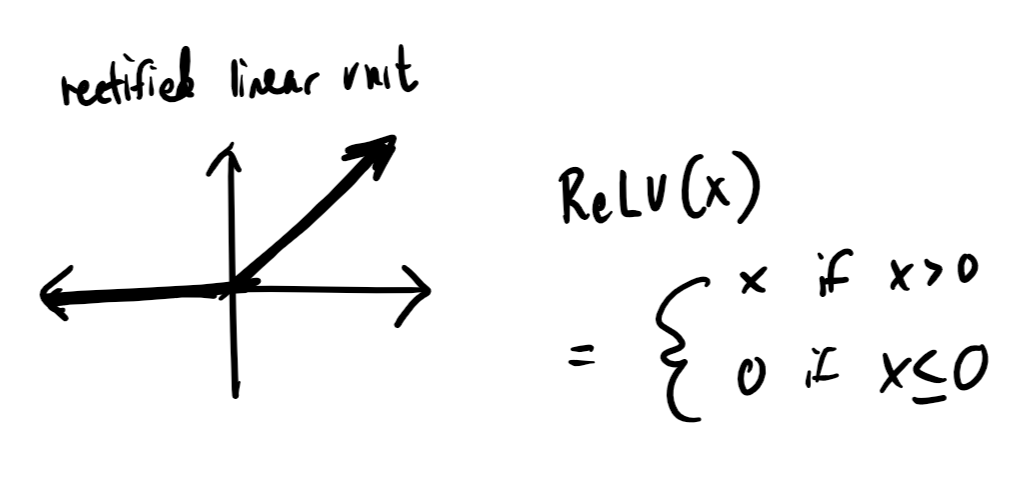

When the input value is greater than 0, the activation function is linear with a derivative of 1. When the input value is less than 0, the activation function is horizontal with a derivative of 0. Thus,$g^{[1]\prime}(Z^{[1]})$is just a matrix of 1s and 0s based on values of $Z^{[1]}$

From here, we do the same calculations as earlier to find  $dW^{[1]}$ and $db^{[1]}$ using X in place of $A^{[1]}$

$dW^{[1]} = \frac{1}{m} dZ^{[1]} X^T \\
dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$

Now we’ve found all the derivatives we need, and all that’s left is to update our parameters:

$W^{[2]} := W^{[2]} - \alpha dW^{[2]} \\ b^{[2]} := b^{[2]} - \alpha db^{[2]} \\ W^{[1]} := W^{[1]} - \alpha dW^{[1]} \\ b^{[1]} := b^{[1]} - \alpha db^{[1]}$

Here, α is our learning rate, a “hyperparameter” that we set to whatever we want. 
α is distinguished from other parameters because, just like the number of layers in the network or the number of units in each layer, it’s a value that we choose for our model rather than one that gradient descent optimizes.

With that, we’ve gone over all the math that we need to carry out gradient descent and train our neural network. To recap: first, we carry out forward propagation, getting a prediction from an input image:

$Z^{[1]} = W^{[1]} X + b^{[1]}\\A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))\\Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\\A^{[2]} = g_{\text{softmax}}(Z^{[2]})$

Then, we carry out backprop to compute loss function derivatives:
$
dZ^{[2]} = A^{[2]} - Y\\dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}\\dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}\\dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})\\dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}\\dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$

Finally, we update our parameters accordingly:
    $W^{[2]} := W^{[2]} - \alpha dW^{[2]} \\ b^{[2]} := b^{[2]} - \alpha db^{[2]} \\ W^{[1]} := W^{[1]} - \alpha dW^{[1]} \\ b^{[1]} := b^{[1]} - \alpha db^{[1]}$

We’ll do this process over and over again — the exact number of times, an iteration count that we again set ourselves — until we are satisfied with the performance of our model.